In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

In [14]:
data = pd.read_excel('data.xlsx')
data.head()

,Recovery time(0≤6 month;1>6 month),姓名,Name,ADL,Gender,Age,Duration after onset of stroke,Brainstem,Infratentorial,Medulla,...,Diabetes,Hyperlipidemia,Coronary heart disease,Pneumonia,Sitting balance,Standing balance,Tracheotomy,CRP,WBC,HB
0,0,吕永杰,1,1,M,65,90,0,0,0,...,1,1,0,1,2,1,0,1.8,7.74,106.0
1,1,张晓平,2,3,M,45,160,1,1,1,...,0,0,0,0,3,2,0,0.8,6.73,139.0
2,0,黄霄云,3,4,F,51,60,1,1,0,...,1,0,0,1,3,1,1,11.7,5.64,129.0
3,1,戴晓兰,4,1,F,52,60,1,1,1,...,0,0,0,1,1,0,1,47.8,4.89,100.0
4,1,谭福根,5,2,M,68,90,1,1,1,...,0,0,0,0,2,2,0,61.0,14.76,116.0


In [15]:

# drop col '姓名'
data.drop(['姓名'], axis=1, inplace=True)
# set 'Name' as index
data.set_index('Name', inplace=True)
data.head()
# for col Gender, convert M to 1 and F to 0
data['Gender'] = data['Gender'].replace({'M': 1, 'F': 0})

/var/folders/mw/2bjnr3px6hxct5mwb1jc3q3h0000gn/T/ipykernel_55626/495315675.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, corr in target_column.iteritems():


Feature: Recovery time(0≤6 month;1>6 month)
Correlation coefficient (r): 1.0
P-value: 0.0

Feature: Duration after onset of stroke
Correlation coefficient (r): 0.32
P-value: 5.001028909837934e-06

Feature: Brainstem
Correlation coefficient (r): 0.31
P-value: 7.880856721724364e-06

Feature: Infratentorial 
Correlation coefficient (r): 0.33
P-value: 2.4245635365946297e-06

Feature: Medulla
Correlation coefficient (r): 0.35
P-value: 3.2968518218156075e-07

Feature: mRS
Correlation coefficient (r): 0.53
P-value: 4.930979191493724e-16

Feature: FOIS
Correlation coefficient (r): -0.3
P-value: 1.4219734091260599e-05

Feature: PRG 
Correlation coefficient (r): 0.57
P-value: 2.900917375446072e-18

Feature: PAS
Correlation coefficient (r): 0.41
P-value: 1.6219778002056509e-09



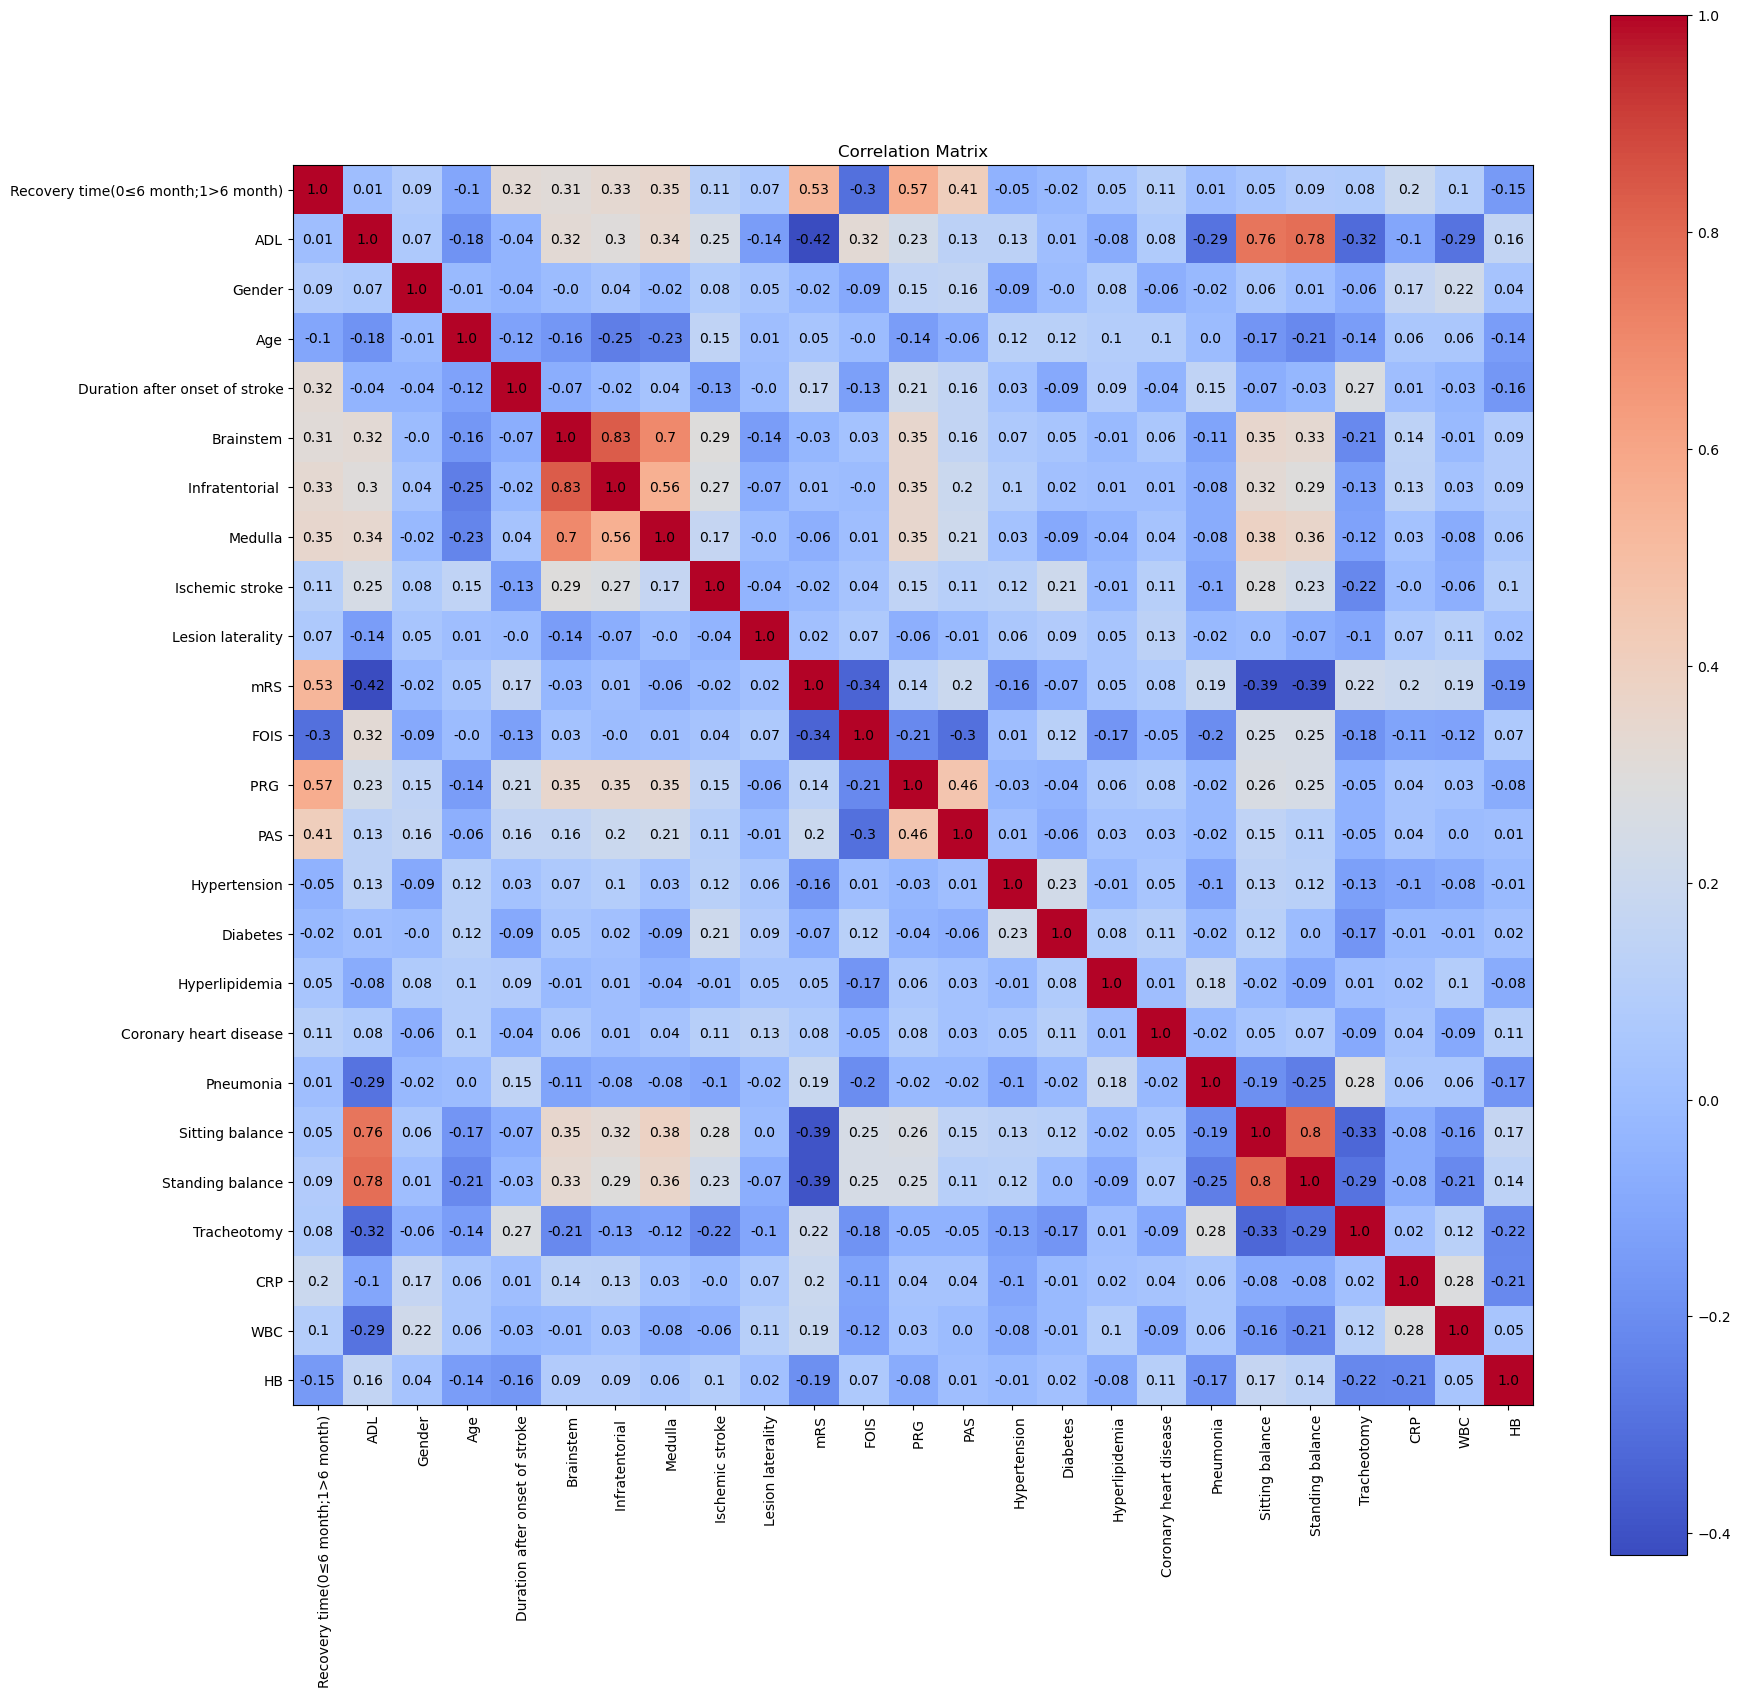

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate correlation matrix
cr = data.corr(method='spearman').round(2)

# Select the column of interest
target_feature = 'Recovery time(0≤6 month;1>6 month)'
target_column = cr[target_feature]

# Print correlation coefficient (r) and p-value for each feature
for feature, corr in target_column.iteritems():
    if abs(corr) > 0.2:
        p_val = stats.spearmanr(data[feature], data[target_feature])[1]
        print(f"Feature: {feature}")
        print(f"Correlation coefficient (r): {corr}")
        print(f"P-value: {p_val}")
        print()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(cr, cmap='coolwarm')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(range(len(cr.columns)))
ax.set_yticks(range(len(cr.index)))
ax.set_xticklabels(cr.columns)
ax.set_yticklabels(cr.index)

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Set title
ax.set_title("Correlation Matrix")

# Display the correlation values in each cell
for i in range(len(cr.index)):
    for j in range(len(cr.columns)):
        text = ax.text(j, i, cr.iloc[i, j], ha="center", va="center", color="black")

plt.show()

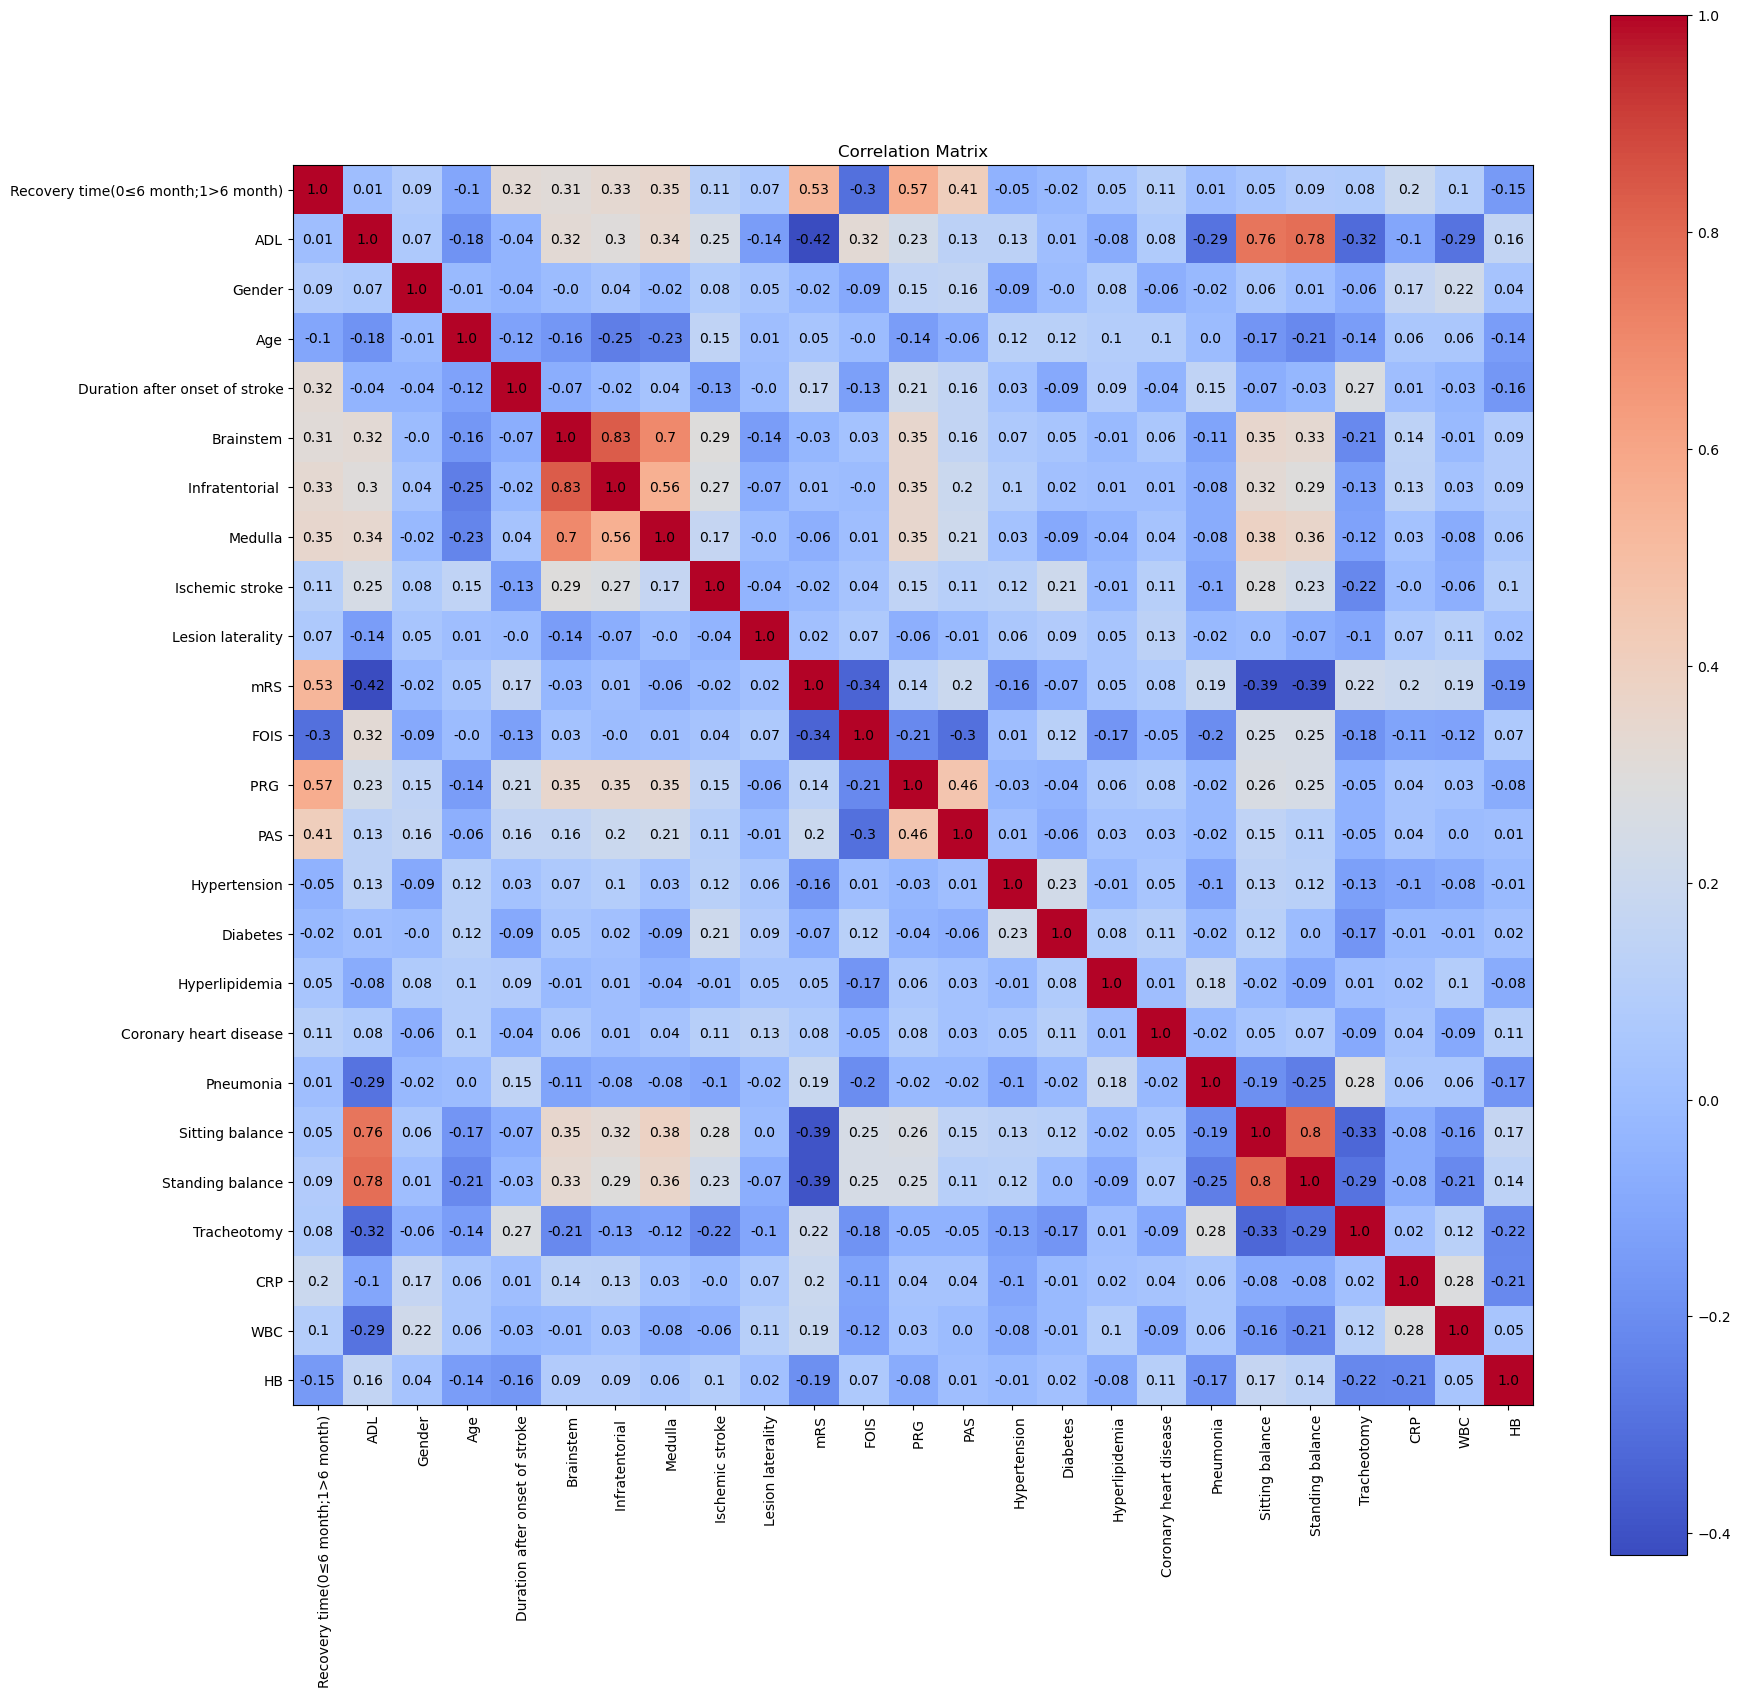

In [17]:
import matplotlib.pyplot as plt

cr = data.corr(method='spearman').round(2)

fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(cr, cmap='coolwarm')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(range(len(cr.columns)))
ax.set_yticks(range(len(cr.index)))
ax.set_xticklabels(cr.columns)
ax.set_yticklabels(cr.index)

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Set title
ax.set_title("Correlation Matrix")

# Display the correlation values in each cell
for i in range(len(cr.index)):
    for j in range(len(cr.columns)):
        text = ax.text(j, i, cr.iloc[i, j], ha="center", va="center", color="black")

plt.show()

In [18]:
data.columns

Index(['Recovery time(0≤6 month;1>6 month)', 'ADL', 'Gender', 'Age',
       'Duration after onset of stroke', 'Brainstem', 'Infratentorial ',
       'Medulla', 'Ischemic stroke', 'Lesion laterality', 'mRS', 'FOIS',
       'PRG ', 'PAS', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'Coronary heart disease', 'Pneumonia', 'Sitting balance',
       'Standing balance', 'Tracheotomy', 'CRP', 'WBC', 'HB'],
      dtype='object')

Linear Support Vector Machine K-fold AUROC: 0.9377961197654292
Random Forest K-fold AUROC: 0.9462101836782144
Adaboost K-fold AUROC: 0.9205236508305562
Linear Discriminant Analysis K-fold AUROC: 0.9268348446097807
Quadratic Discriminant Analysis K-fold AUROC: 0.9086271926425379


/Users/yanbin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yanbin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yanbin/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron K-fold AUROC: 0.9012968560283138


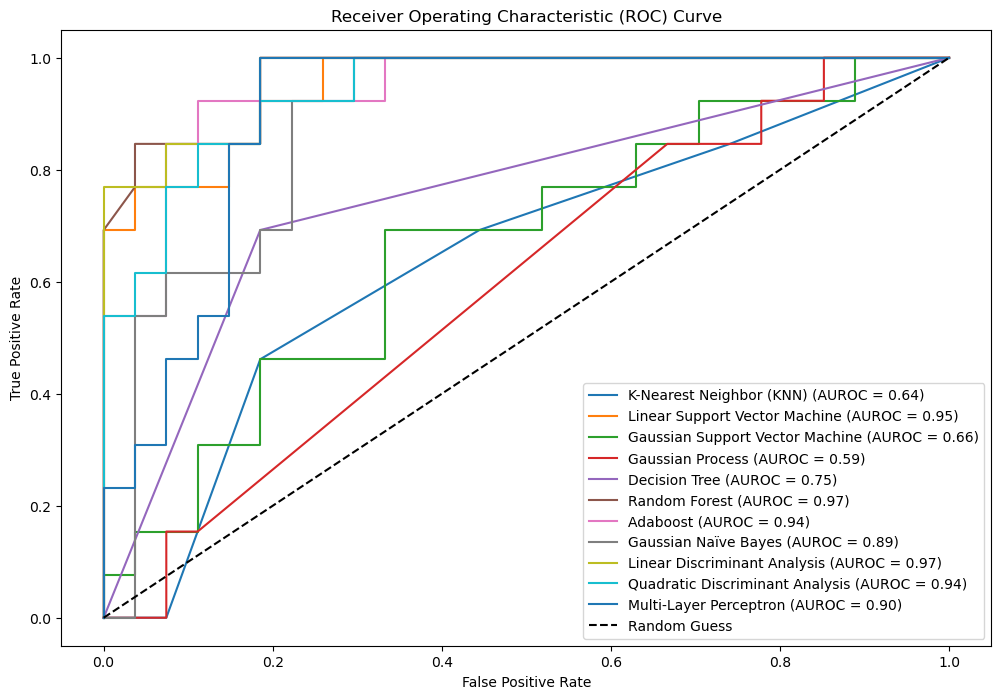

In [19]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

plt.figure(figsize=(12,8))
# Load the dataset into a DataFrame
df = data

# Assign the feature matrix X and the target variable y
X = df.drop('Recovery time(0≤6 month;1>6 month)', axis=1)
y = df['Recovery time(0≤6 month;1>6 month)']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the machine learning models
models = [
    ("K-Nearest Neighbor (KNN)", KNeighborsClassifier()),
    ("Linear Support Vector Machine", SVC(kernel='linear',probability=True)),
    ("Gaussian Support Vector Machine", SVC(probability=True)),
    ("Gaussian Process", GaussianProcessClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Adaboost", AdaBoostClassifier()),
    ("Gaussian Naïve Bayes", GaussianNB()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Multi-Layer Perceptron", MLPClassifier(max_iter=1000))
]




# Collect AUROC values
auroc_values = []

# Train and evaluate the models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]  # Predict probabilities for positive class
    fpr, tpr, _ = roc_curve(y_val, y_pred)  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUROC

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUROC = {roc_auc:.2f})')

    if roc_auc > 0.90:
        # Perform K-fold cross-validation
        kfold_auroc = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
        print(f"{name} K-fold AUROC: {kfold_auroc.mean()}")
        auroc_values.append((name, kfold_auroc))

# Plot the random guess line

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
#plt.figure(figsize=(2,6))

plt.show()

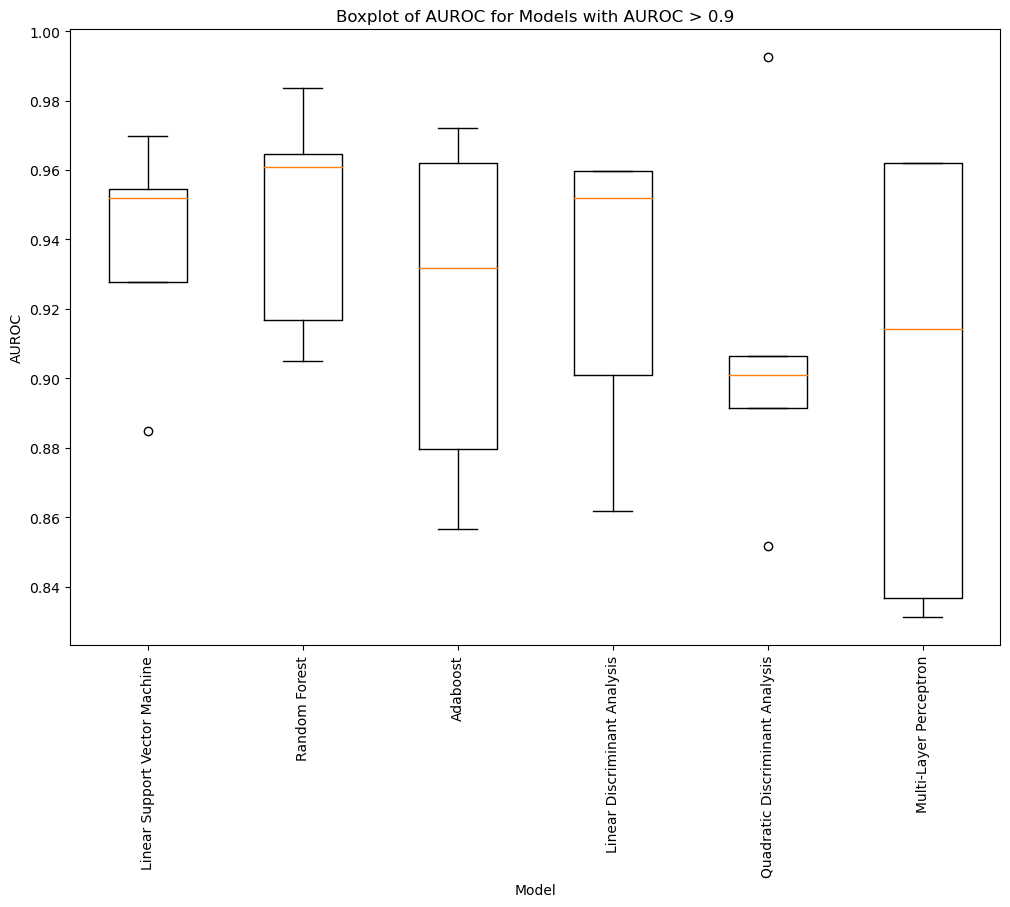

In [21]:
# Create a DataFrame from the AUROC values
df_auroc = pd.DataFrame(auroc_values, columns=["Model", "AUROC"])

# Filter models with AUROC > 0.9
df_filtered = df_auroc[df_auroc["AUROC"].apply(lambda auroc: len(auroc) > 0)]

# Create a list to store the AUROC arrays
auroc_arrays = []

# Iterate over the filtered dataframe
for _, row in df_filtered.iterrows():
    auroc_arrays.append(row["AUROC"])

# Plot boxplot
plt.figure(figsize=(12,8))
plt.boxplot(auroc_arrays, labels=df_filtered["Model"])
plt.xlabel("Model")
plt.ylabel("AUROC")
plt.title("Boxplot of AUROC for Models with AUROC > 0.9")
plt.xticks(rotation=90)
plt.show()

In [22]:

import numpy as np

# Calculate the variance of AUROC arrays
variances = [np.std(auroc) for auroc in auroc_arrays]

# Print the variances
for model, variance in zip(df_filtered["Model"], variances):
    print(f"Model: {model}, Standard Deviation: {variance:.2f}")

Model: Linear Support Vector Machine, Standard Deviation: 0.03
Model: Random Forest, Standard Deviation: 0.03
Model: Adaboost, Standard Deviation: 0.05
Model: Linear Discriminant Analysis, Standard Deviation: 0.04
Model: Quadratic Discriminant Analysis, Standard Deviation: 0.05
Model: Multi-Layer Perceptron, Standard Deviation: 0.06


In [23]:
np.std(auroc_arrays[0])

0.029655326724273238

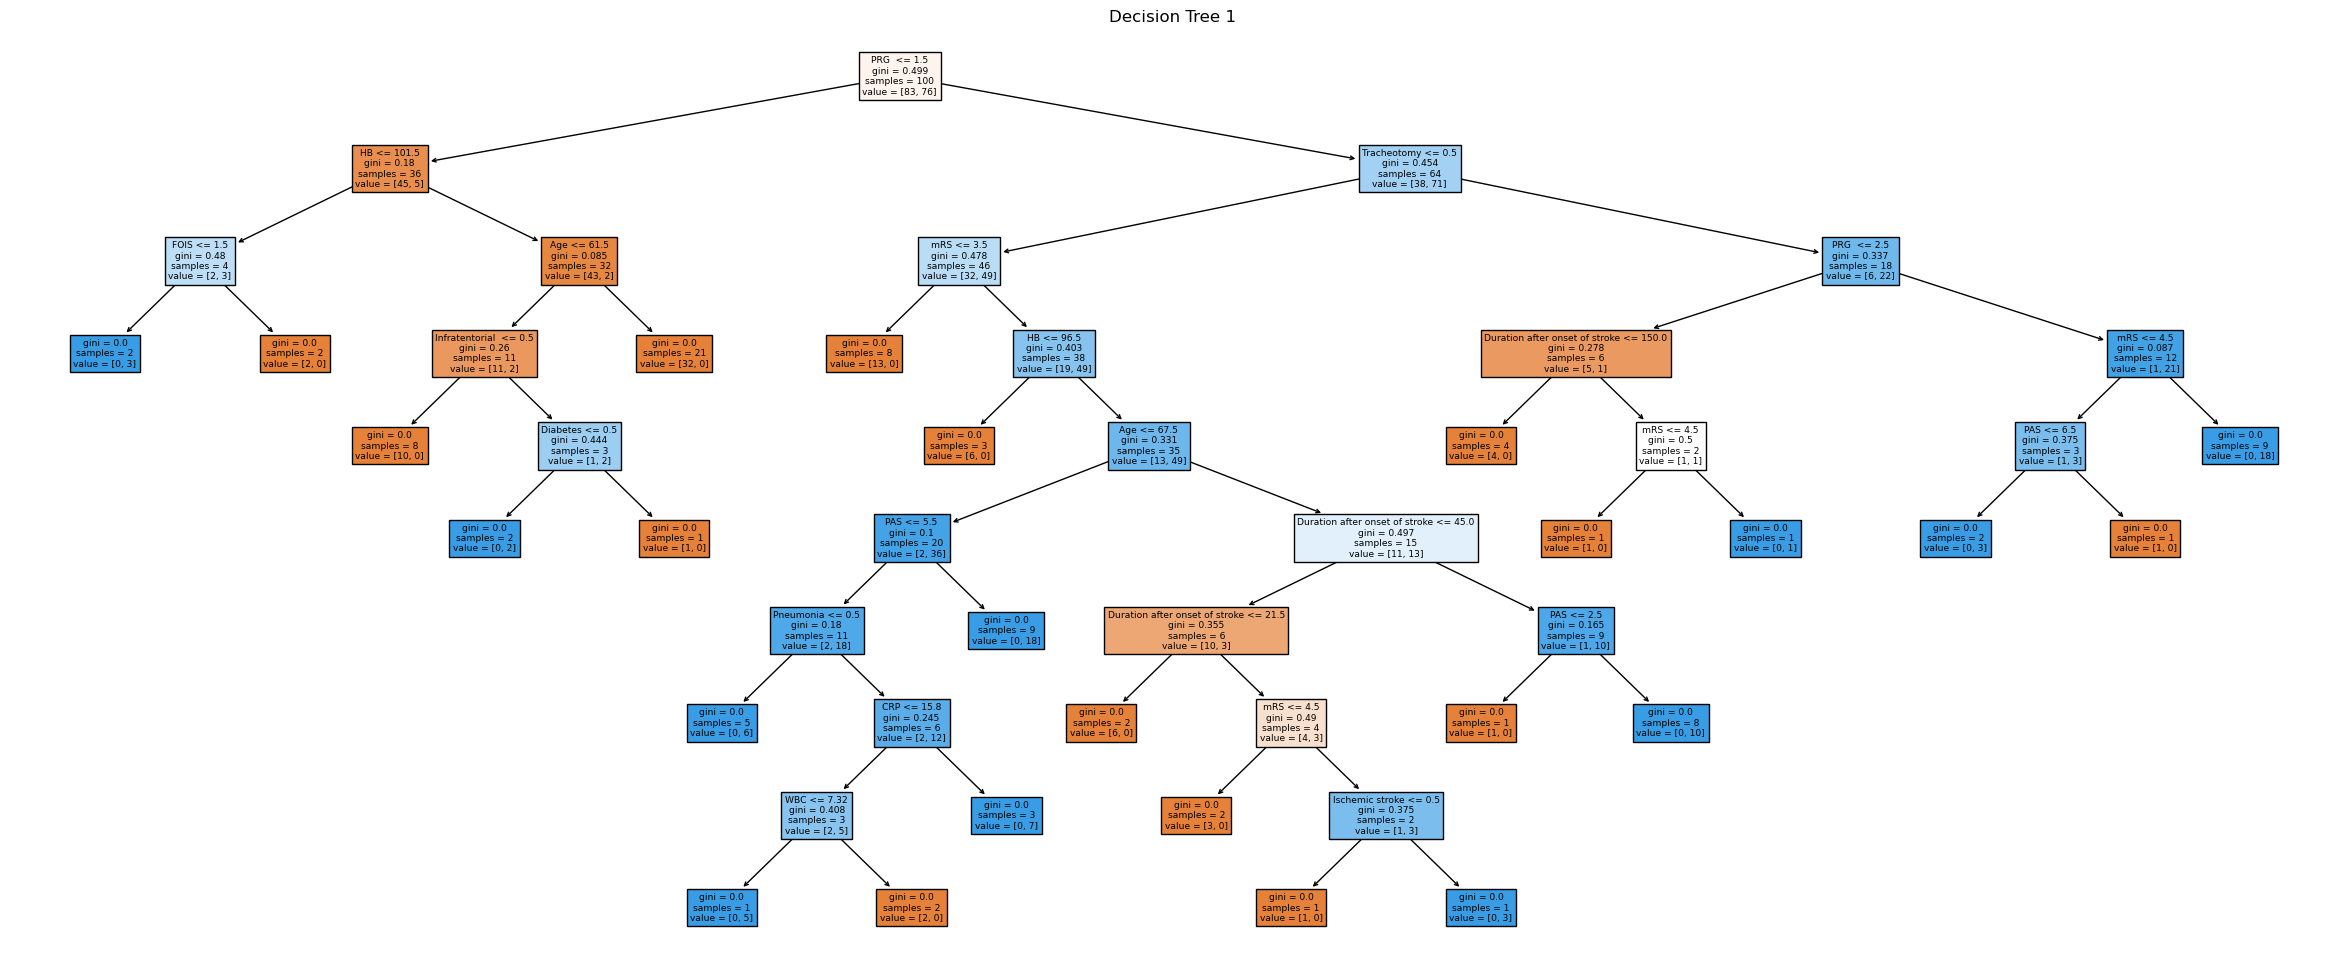

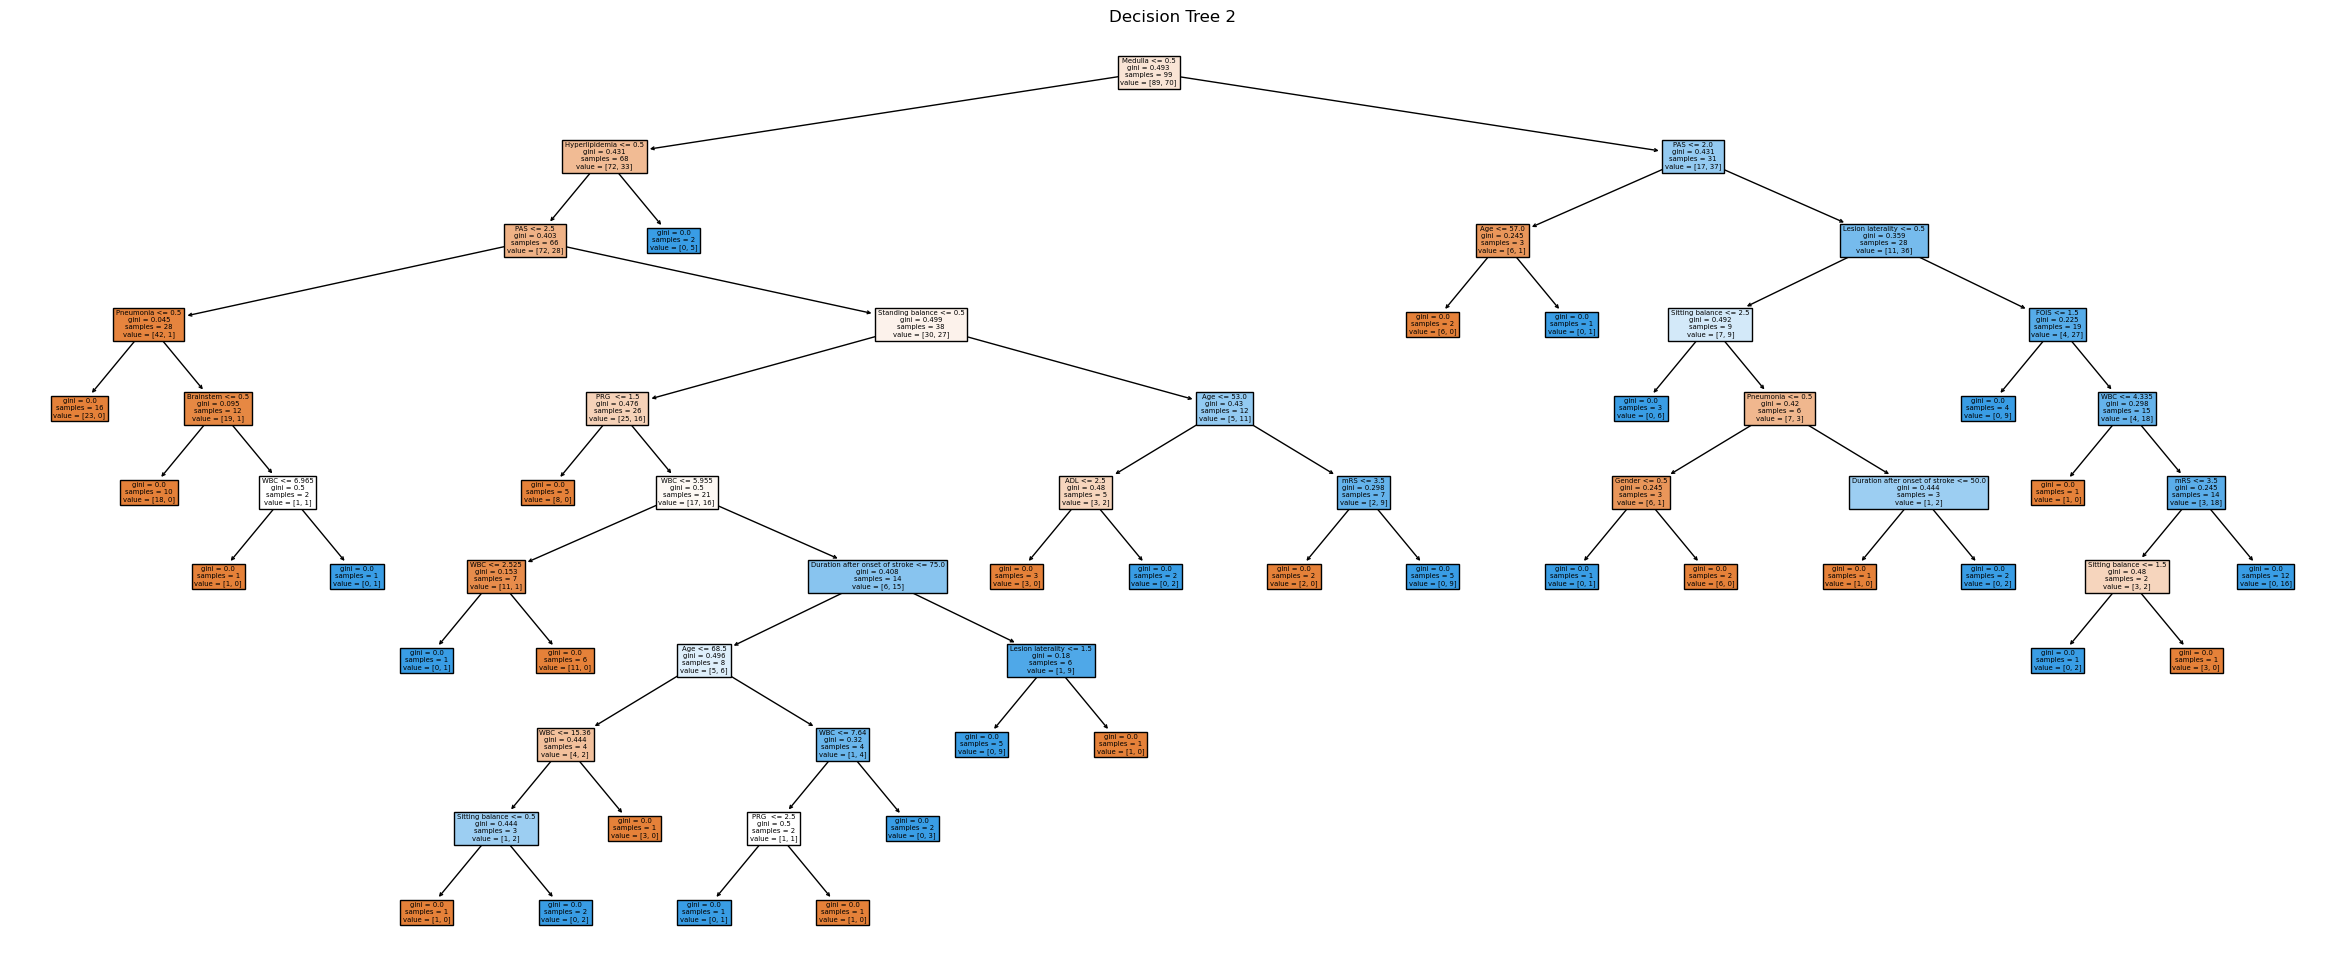

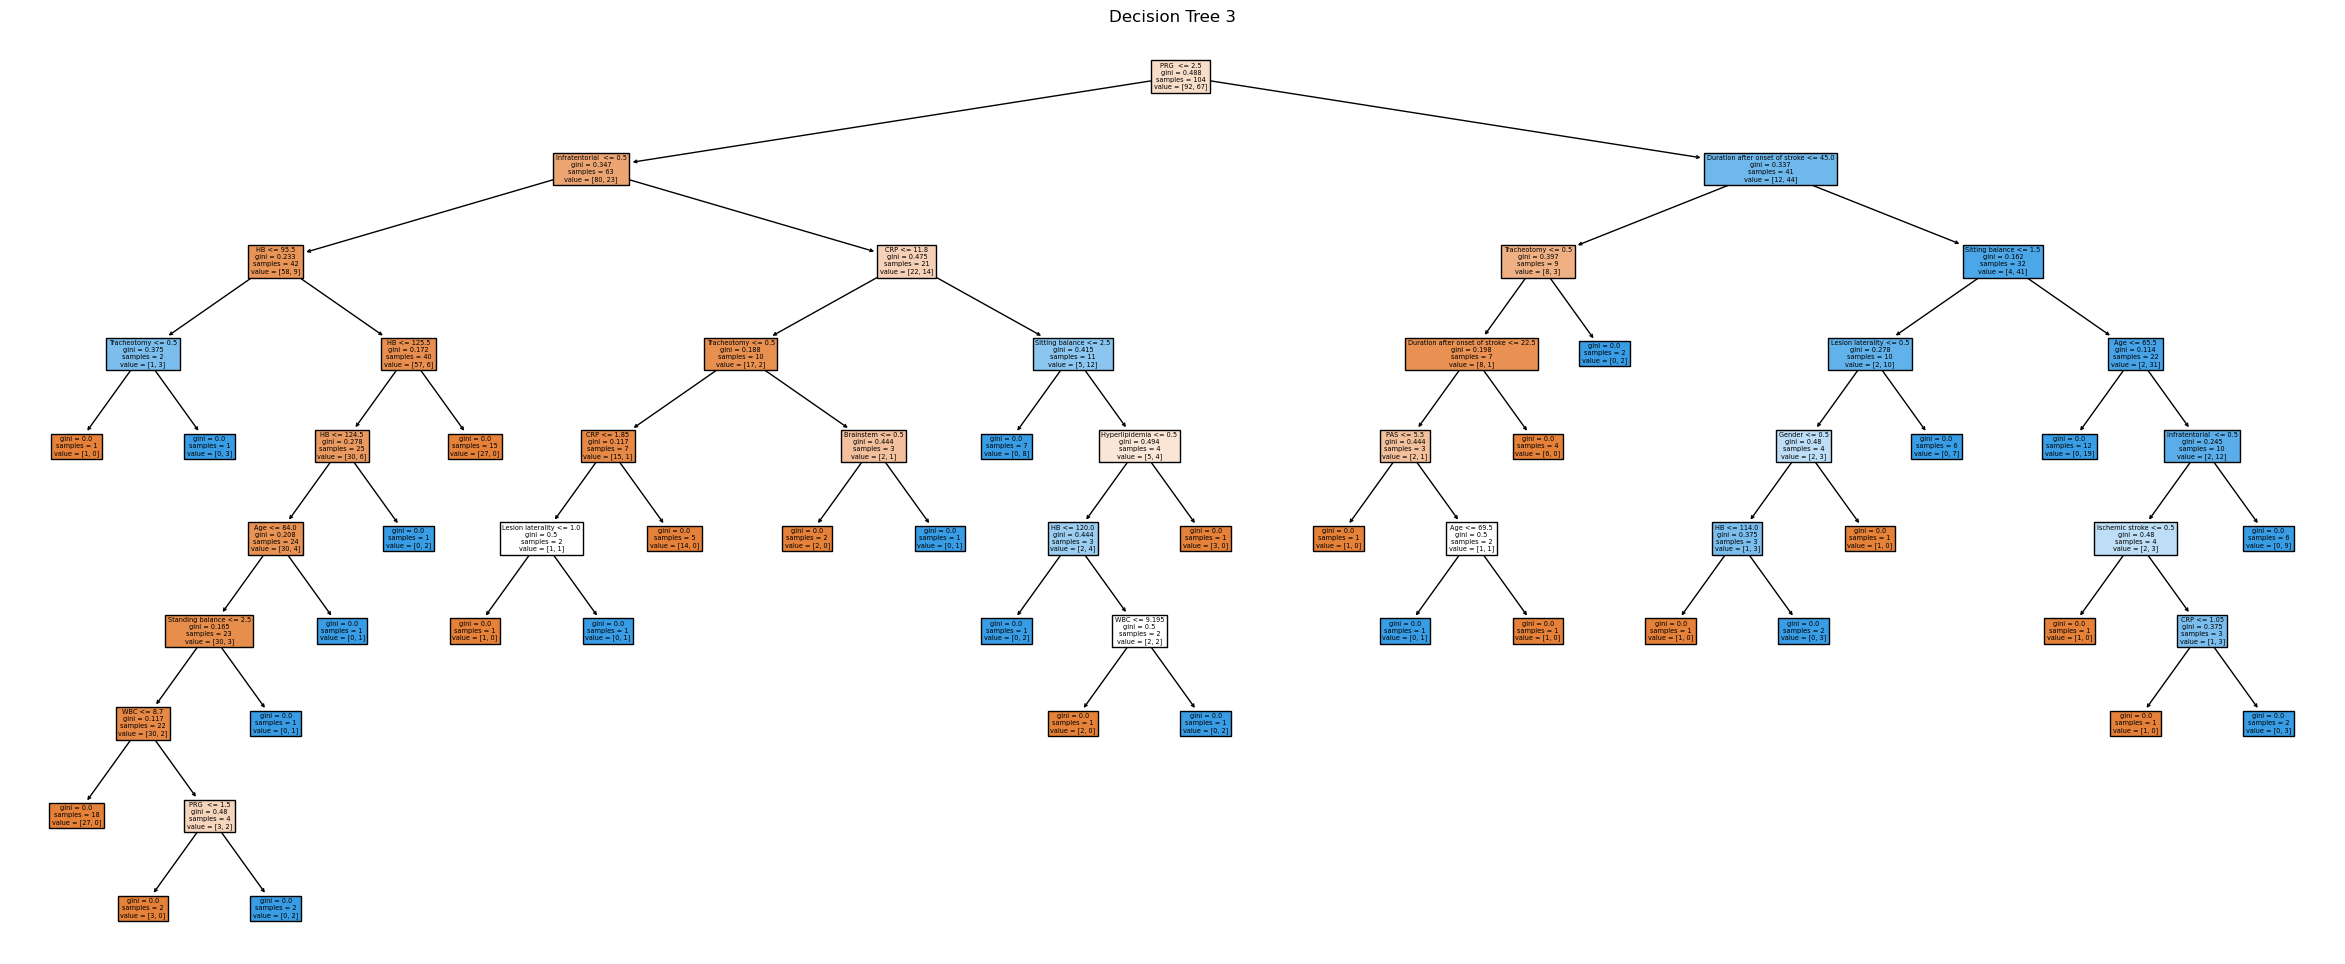

In [24]:
from sklearn.tree import plot_tree

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Plot the first few trees of the Random Forest
num_trees_to_plot = 3  # Adjust this value to plot more or fewer trees

for i in range(num_trees_to_plot):
    plt.figure(figsize=(30, 12))
    plot_tree(rf.estimators_[i], feature_names=X_train.columns, filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

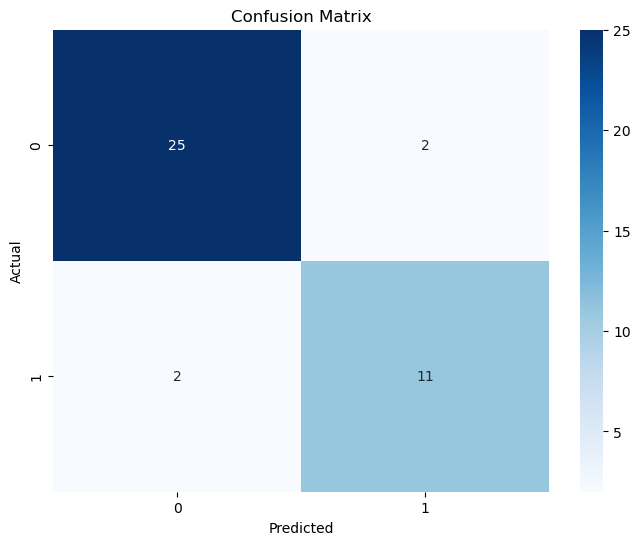

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# rename Feature PRG to PRG1
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({'PRG ': 'PRG'})
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({'Infratentorial ': 'Infratentorial'})

In [27]:
feature_importance_df['Feature']

0                                ADL
1                             Gender
2                                Age
3     Duration after onset of stroke
4                          Brainstem
5                     Infratentorial
6                            Medulla
7                    Ischemic stroke
8                  Lesion laterality
9                                mRS
10                              FOIS
11                               PRG
12                               PAS
13                      Hypertension
14                          Diabetes
15                    Hyperlipidemia
16            Coronary heart disease
17                         Pneumonia
18                   Sitting balance
19                  Standing balance
20                       Tracheotomy
21                               CRP
22                               WBC
23                                HB
Name: Feature, dtype: object

In [28]:
import pandas as pd

# Define feature groups
functional_assessment_features = ['ADL', 'Standing balance', 'Sitting balance', 'FOIS', 'PAS', 'PRG', 'mRS'] # PRG 不见了
auxiliary_examination_features = ['WBC', 'HB', 'CRP']
comorbidities_features = ['Hyperlipidemia', 'Pneumonia', 'Hypertension', 'Coronary heart disease', 'Diabetes']
basic_clinical_variables_features = ['Ischemic stroke', 'Brainstem', 'Medulla', 'Lesion laterality', 'Infratentorial',
                                     'Tracheotomy', 'Duration after onset of stroke', 'Gender', 'Age']

# Filter feature importance DataFrame by feature groups
functional_assessment_df = feature_importance_df[feature_importance_df['Feature'].isin(functional_assessment_features)]
auxiliary_examination_df = feature_importance_df[feature_importance_df['Feature'].isin(auxiliary_examination_features)]
comorbidities_df = feature_importance_df[feature_importance_df['Feature'].isin(comorbidities_features)]
basic_clinical_variables_df = feature_importance_df[feature_importance_df['Feature'].isin(basic_clinical_variables_features)]

# Normalize the importance values for each feature group
functional_assessment_df['Importance'] = functional_assessment_df['Importance'] / functional_assessment_df['Importance'].sum()
auxiliary_examination_df['Importance'] = auxiliary_examination_df['Importance'] / auxiliary_examination_df['Importance'].sum()
comorbidities_df['Importance'] = comorbidities_df['Importance'] / comorbidities_df['Importance'].sum()
basic_clinical_variables_df['Importance'] = basic_clinical_variables_df['Importance'] / basic_clinical_variables_df['Importance'].sum()

# Print the normalized feature importance dataframes
print("Functional Assessment:")
print(functional_assessment_df)
print("\nAuxiliary Examination:")
print(auxiliary_examination_df)
print("\nComorbidities:")
print(comorbidities_df)
print("\nBasic Clinical Variables:")
print(basic_clinical_variables_df)

Functional Assessment:
             Feature  Importance
0                ADL    0.039833
9                mRS    0.280127
10              FOIS    0.072533
11               PRG    0.282499
12               PAS    0.223442
18   Sitting balance    0.048685
19  Standing balance    0.052881

Auxiliary Examination:
   Feature  Importance
21     CRP    0.378985
22     WBC    0.281620
23      HB    0.339396

Comorbidities:
                   Feature  Importance
13            Hypertension    0.255852
14                Diabetes    0.194098
15          Hyperlipidemia    0.093406
16  Coronary heart disease    0.153029
17               Pneumonia    0.303615

Basic Clinical Variables:
                           Feature  Importance
1                           Gender    0.025768
2                              Age    0.169866
3   Duration after onset of stroke    0.244638
4                        Brainstem    0.115857
5                   Infratentorial    0.108441
6                          Medulla    

/var/folders/mw/2bjnr3px6hxct5mwb1jc3q3h0000gn/T/ipykernel_55626/1301936807.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_assessment_df['Importance'] = functional_assessment_df['Importance'] / functional_assessment_df['Importance'].sum()
/var/folders/mw/2bjnr3px6hxct5mwb1jc3q3h0000gn/T/ipykernel_55626/1301936807.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliary_examination_df['Importance'] = auxiliary_examination_df['Importance'] / auxiliary_examination_df['Importance'].sum()


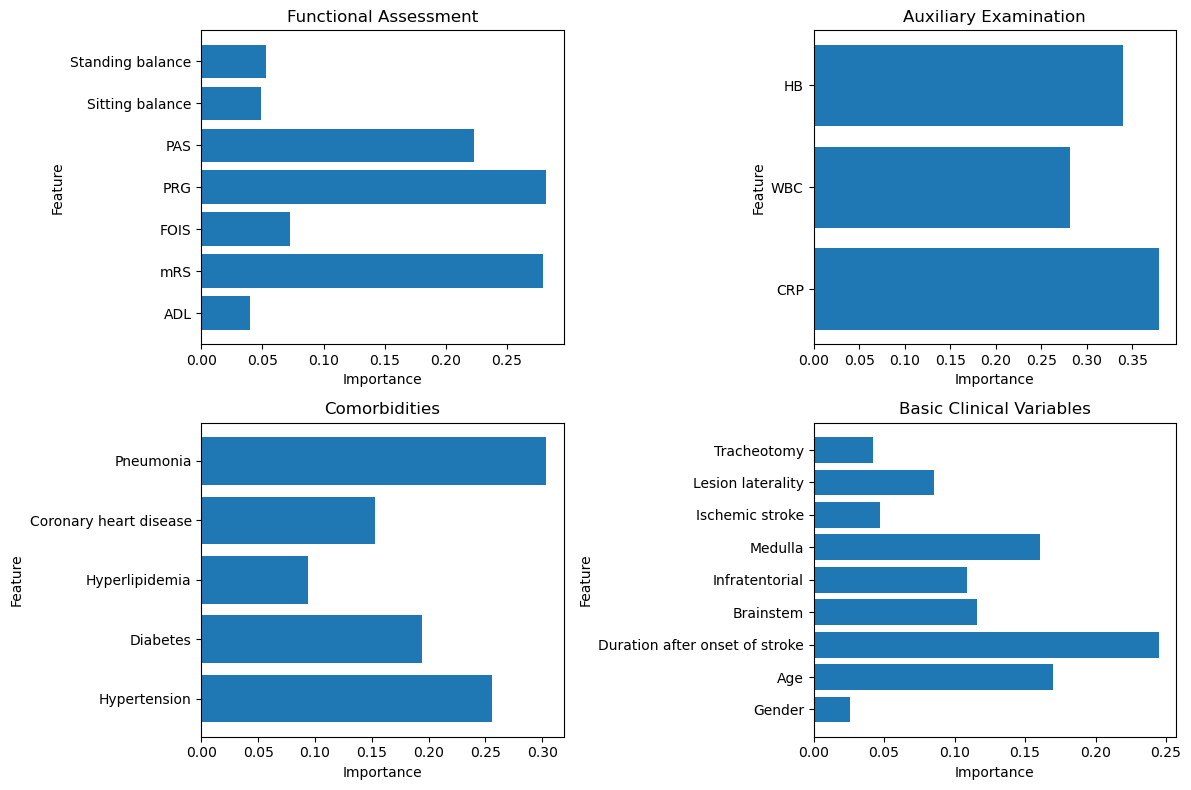

In [29]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Functional Assessment feature importances
axes[0, 0].barh(functional_assessment_df['Feature'], functional_assessment_df['Importance'])
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_ylabel('Feature')
axes[0, 0].set_title('Functional Assessment')

# Plot Auxiliary Examination feature importances
axes[0, 1].barh(auxiliary_examination_df['Feature'], auxiliary_examination_df['Importance'])
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_ylabel('Feature')
axes[0, 1].set_title('Auxiliary Examination')

# Plot Comorbidities feature importances
axes[1, 0].barh(comorbidities_df['Feature'], comorbidities_df['Importance'])
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_ylabel('Feature')
axes[1, 0].set_title('Comorbidities')

# Plot Basic Clinical Variables feature importances
axes[1, 1].barh(basic_clinical_variables_df['Feature'], basic_clinical_variables_df['Importance'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_ylabel('Feature')
axes[1, 1].set_title('Basic Clinical Variables')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [30]:
functional_assessment_df

,Feature,Importance
0,ADL,0.039833
9,mRS,0.280127
10,FOIS,0.072533
11,PRG,0.282499
12,PAS,0.223442
18,Sitting balance,0.048685
19,Standing balance,0.052881


In [31]:
feature_importance_df

,Feature,Importance
0,ADL,0.019424
1,Gender,0.007212
2,Age,0.047543
3,Duration after onset of stroke,0.068470
4,Brainstem,0.032426
5,Infratentorial,0.030351
6,Medulla,0.044975
7,Ischemic stroke,0.013254
8,Lesion laterality,0.023871
9,mRS,0.136597
